In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN
import sys
print(sys.executable)
import chess
import sqlite3
import chess.pgn
import os
import ast
import subprocess
import time
import csv
import traceback
from pathlib import Path
from tqdm import tqdm
from typing import Tuple, List, Dict, Optional,Callable,Any
import platform
from datetime import datetime
from huggingface_hub import notebook_login
from datasets import load_dataset
from prefect import flow, task
from collections import defaultdict
import seaborn as sns
from fuzzywuzzy import process
import hdbscan
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

db_file=r"C:\sqlite3\chess.db"
conn=sqlite3.connect(db_file)
df1=pd.read_sql_query("SELECT * FROM players",conn)
df2=pd.read_sql_query("SELECT * FROM player_piece_life",conn)
conn.close()
df2_temp = df2.copy()
df2_temp.rename(columns={"player": "user"}, inplace=True)
player_merged = df1.merge(df2_temp, on="user", how="left")

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\python.exe


In [54]:
print(player_merged['TotalGames'].describe())
print((player_merged['TotalGames']>100).value_counts())

count    8816.000000
mean      117.751021
std       205.176138
min         1.000000
25%        14.000000
50%        45.000000
75%       128.000000
max      2284.000000
Name: TotalGames, dtype: float64
TotalGames
False    6121
True     2695
Name: count, dtype: int64


In [51]:
from sklearn.metrics import silhouette_score
import networkx as nx
import community.community_louvain as community
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import plotly.figure_factory as ff

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11192\2983194612.py:30: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



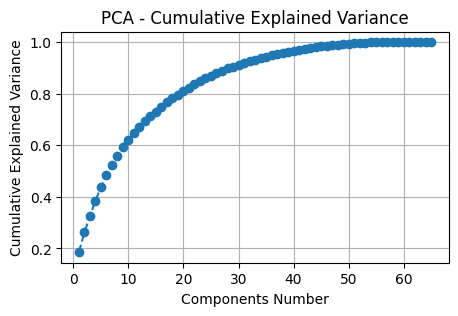

PC1: 0.185, cumulative: 0.185
PC2: 0.077, cumulative: 0.262
PC3: 0.062, cumulative: 0.324
PC4: 0.060, cumulative: 0.385
PC5: 0.052, cumulative: 0.437
PC6: 0.047, cumulative: 0.484
PC7: 0.039, cumulative: 0.523
PC8: 0.037, cumulative: 0.560
PC9: 0.034, cumulative: 0.593
PC10: 0.028, cumulative: 0.621
PC11: 0.025, cumulative: 0.646
PC12: 0.024, cumulative: 0.670
PC13: 0.023, cumulative: 0.692
PC14: 0.020, cumulative: 0.712
PC15: 0.019, cumulative: 0.731
PC16: 0.018, cumulative: 0.749
PC17: 0.017, cumulative: 0.766
PC18: 0.015, cumulative: 0.782
PC19: 0.015, cumulative: 0.797
PC20: 0.014, cumulative: 0.811
PC21: 0.013, cumulative: 0.824
PC22: 0.013, cumulative: 0.837
PC23: 0.012, cumulative: 0.849
PC24: 0.011, cumulative: 0.860
PC25: 0.010, cumulative: 0.870
PC26: 0.010, cumulative: 0.880
PC27: 0.009, cumulative: 0.889
PC28: 0.009, cumulative: 0.898
PC29: 0.007, cumulative: 0.906
PC30: 0.007, cumulative: 0.913
PC31: 0.007, cumulative: 0.920
PC32: 0.006, cumulative: 0.926
PC33: 0.006, cumu

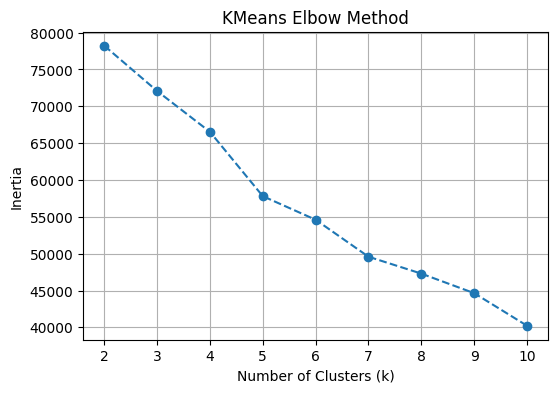

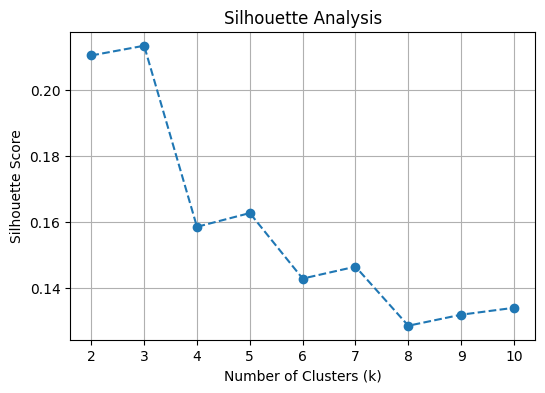


KMeans 聚类评估结果：
 k  Inertia  Silhouette
 2 78217.53      0.2106
 3 72070.65      0.2136
 4 66525.76      0.1585
 5 57800.31      0.1627
 6 54604.27      0.1428
 7 49586.94      0.1464
 8 47294.56      0.1284
 9 44641.98      0.1318
10 40225.39      0.1339


In [32]:
dfc=player_merged[player_merged['TotalGames']>100].copy()
nemeric_cols=[
    'CenterControlScore', 'PieceActivityScore', 'KingSafetyScore',
       'CastlingScore', 'KingTropismScore', 'KingDefendersScore',
       'KingPawnShieldScore', 'KingZoneControlScore',
       'KingDiagonalExposureScore', 'KingEscapeSquaresScore', 'CaptureRatio',
       'PawnCenter', 'AveragePawnAdvanceDepth', 'CheckRatio', 'ForceRatio',
       'PawnIsolateScore', 'PawnOverlapScore', 'PawnProtectScore',
       'queen_1LifeRatio', 'rook_1LifeRatio', 'rook_2LifeRatio',
       'bishop_1LifeRatio', 'bishop_2LifeRatio', 'knight_1LifeRatio',
       'knight_2LifeRatio', 'pawn_1LifeRatio', 'pawn_2LifeRatio',
       'pawn_3LifeRatio', 'pawn_4LifeRatio', 'pawn_5LifeRatio',
       'pawn_6LifeRatio', 'pawn_7LifeRatio', 'pawn_8LifeRatio',
       'queen_promo_1LifeRatio', 'queen_promo_2LifeRatio',
       'queen_promo_3LifeRatio', 'queen_promo_4LifeRatio',
       'queen_promo_5LifeRatio', 'queen_promo_6LifeRatio',
       'queen_promo_7LifeRatio', 'queen_promo_8LifeRatio',
       'rook_promo_1LifeRatio', 'rook_promo_2LifeRatio',
       'rook_promo_3LifeRatio', 'rook_promo_4LifeRatio',
       'rook_promo_5LifeRatio', 'rook_promo_6LifeRatio',
       'rook_promo_7LifeRatio', 'rook_promo_8LifeRatio',
       'bishop_promo_1LifeRatio', 'bishop_promo_2LifeRatio',
       'bishop_promo_3LifeRatio', 'bishop_promo_4LifeRatio',
       'bishop_promo_5LifeRatio', 'bishop_promo_6LifeRatio',
       'bishop_promo_7LifeRatio', 'bishop_promo_8LifeRatio',
       'knight_promo_1LifeRatio', 'knight_promo_2LifeRatio',
       'knight_promo_3LifeRatio', 'knight_promo_4LifeRatio',
       'knight_promo_5LifeRatio', 'knight_promo_6LifeRatio',
       'knight_promo_7LifeRatio', 'knight_promo_8LifeRatio']
X = dfc[nemeric_cols].fillna(0)
X_scaled = StandardScaler().fit_transform(X)
pca = PCA().fit(X_scaled)
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(5,3))
plt.plot(range(1, len(explained_var)+1),
         explained_var.cumsum(),
         marker="o", linestyle="--")
plt.xlabel("Components Number")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()
for i, var in enumerate(explained_var, start=1):
    print(f"PC{i}: {var:.3f}, cumulative: {explained_var[:i].sum():.3f}")
    


pca=PCA(n_components=10)
X_pca=pca.fit_transform(X_scaled)

K = range(2, 11)
inertias = []
scores = []
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    inertias.append(km.inertia_)
    scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'o--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(K, scores, 'o--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

results = pd.DataFrame({
    "k": list(K),
    "Inertia": [round(x, 2) for x in inertias],
    "Silhouette": [round(x, 4) for x in scores]
})
print("\nKMeans 聚类评估结果：")
print(results.to_string(index=False))

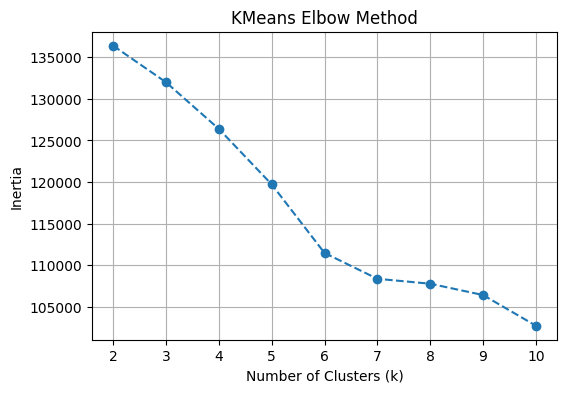

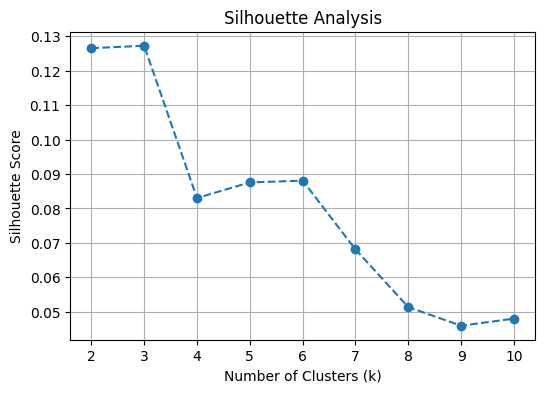


KMeans 聚类评估结果：
 k   Inertia  Silhouette
 2 136397.07      0.1265
 3 132002.62      0.1272
 4 126388.62      0.0830
 5 119718.11      0.0876
 6 111469.42      0.0881
 7 108361.29      0.0681
 8 107770.26      0.0513
 9 106408.95      0.0459
10 102718.10      0.0480


In [33]:
pca=PCA(n_components=55)
X_pca=pca.fit_transform(X_scaled)

K = range(2, 11)
inertias = []
scores = []
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    inertias.append(km.inertia_)
    scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'o--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(K, scores, 'o--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

results = pd.DataFrame({
    "k": list(K),
    "Inertia": [round(x, 2) for x in inertias],
    "Silhouette": [round(x, 4) for x in scores]
})
print("\nKMeans 聚类评估结果：")
print(results.to_string(index=False))

Text(0.5, 1.0, 'Chess Player Cosine Similarity Distribution')

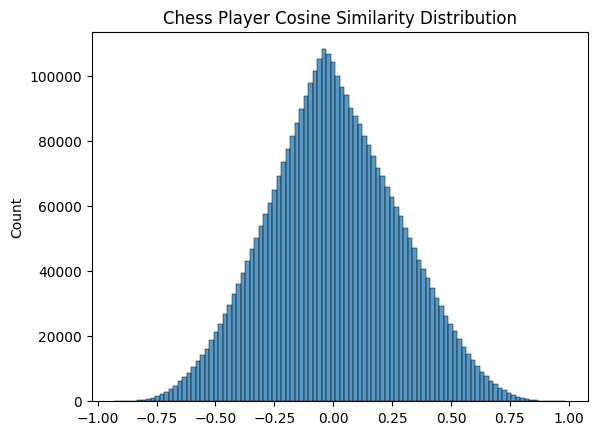

In [55]:
player_coords=pd.DataFrame(
    X_pca,
    index=dfc.loc[X.index, "user"], 
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]
)
similarity_matrix=pd.DataFrame(
    cosine_similarity(player_coords),
    index=player_coords.index,
    columns=player_coords.index
)
sns.histplot(similarity_matrix.values[np.triu_indices_from(similarity_matrix, k=1)], bins=100)
plt.title("Chess Player Cosine Similarity Distribution")

In [56]:
sim_values=similarity_matrix.values
players=similarity_matrix.index
pairs=[]
for i in range(len(players)):
    for j in range(i+1, len(players)):
        pairs.append((players[i], players[j], sim_values[i, j]))

similar_pairs=pd.DataFrame(pairs, columns=["PlayerA", "PlayerB", "Similarity"])
similar_pairs_sorted=similar_pairs.sort_values("Similarity", ascending=False)

similar_pairs_sorted.head(20)

PlayerA                PlayerB  Similarity
248465      Aleksandr Shimanov             Tejas Rama    0.985374
780824              AradNazari          Ivan Kalajzic    0.971182
2327833     Jakob Leon Pajeken       Roman Shogdzhiev    0.965084
354004     Alexander Mikhnenko       Roman Shogdzhiev    0.957596
353030     Alexander Mikhnenko     Jakob Leon Pajeken    0.954635
574081   Anastasios Mihailidis             Ethan Saya    0.952939
1728043          Enrique Butti          GERARDO MARIN    0.948650
3425119       Roman Shogdzhiev     Satria Duta Cahaya    0.948043
1945395        Gaioz Nigalidze        Vladimir Dobrov    0.947428
225771      Aleksandar Topalov       BobbyFischer1508    0.943920
1728991          Enrique Butti         Olaf Michalski    0.940448
854684            Artem Bardyk         Luca Moroni Jr    0.940396
3551261              Terry Luo       Vasif Durarbayli    0.938931
300694               Alex Jian    Alexander Mikhnenko    0.937586
1925646          GERARDO MARIN         Jaroslav Sobek    0.935997
301640               Alex Jian     Jakob Leon Pajeken    0.935884
2358652         Jan Klimkowski       Vasif Durarbayli    0.933481
2358714         Jan Klimkowski  Vladimir Mikhailovsky    0.933294
2358552         Jan Klimkowski              Terry Luo    0.932001
1532200         Dina Belenkaya        Gaioz Nigalidze    0.929338

In [37]:
pairs_to_check = [
    ("Anish Giri", "Wesley So"),                #顶尖策略型
    ("Hikaru Nakamura", "Alireza Firouzja"),   #攻击型快棋
    ("Magnus Carlsen","Hikaru Nakamura")
]


def find_closest_name(name, all_names):
    match = get_close_matches(name, all_names, n=1, cutoff=0.6)
    return match[0] if match else None

def check_similarity(a, b, similarity_matrix, top_n=10):
    all_names = similarity_matrix.index.tolist()
    
    if a not in all_names:
        a_match = find_closest_name(a, all_names)
        print(f"{a} not found, closest match: {a_match}")
        a = a_match
    if b not in all_names:
        b_match = find_closest_name(b, all_names)
        print(f"{b} not found, closest match: {b_match}")
        b = b_match
    
    if a is None or b is None:
        print("Skipping due to unmatched name.")
        return

    sims = similarity_matrix.loc[a].sort_values(ascending=False)
    sim_ab = similarity_matrix.loc[a, b]
    rank = np.where(sims.index == b)[0][0] + 1

    print("="*60) 
    print(f"\nPlayer {a} vs {b}")
    print(f"Similarity: {sim_ab:.3f}")
    print(f"{b}'s similarity rank in {a}'s list: {rank} / {len(sims)}")
    print(f"Top {top_n} most similar players to {a}:")
    print(sims.head(top_n))
    print("="*60 + "\n")  

for a, b in pairs_to_check:
    check_similarity(a, b, similarity_matrix, top_n=20)


Player Anish Giri vs Wesley So
Similarity: 0.037
Wesley So's similarity rank in Anish Giri's list: 1251 / 2695
Top 20 most similar players to Anish Giri:
user
Anish Giri             1.000000
Denis Lazavik          0.823676
Vidit Gujrathi         0.814496
Harsha Bharathakoti    0.807303
Gloomy_Wanderer        0.784239
Daniil Dubov           0.772423
Renato Quintiliano     0.758048
Sanan Sjugirov         0.757027
Alexander Grischuk     0.734975
Murad İbrahimli        0.721271
Samvel Ter-Sahakyan    0.720903
Igor Bjelobrk          0.710158
Vincent Keymer         0.702322
Alexander Zubov        0.700221
Rinat Jumabayev        0.699110
Mahammad Muradli       0.698273
Nils Grandelius        0.684816
Valery Kazakouski      0.675001
Egor Lashkin           0.673465
Alexey Reshetnikov     0.668993
Name: Anish Giri, dtype: float64


Player Hikaru Nakamura vs Alireza Firouzja
Similarity: 0.086
Alireza Firouzja's similarity rank in Hikaru Nakamura's list: 165 / 2695
Top 20 most similar players to 

In [ ]:
# results on old seems to be better
pairs_to_check = [
    ("Anish Giri", "Wesley So"),                #顶尖策略型
    ("Hikaru Nakamura", "Alireza Firouzja"),   #攻击型快棋
    ("Magnus Carlsen","Hikaru Nakamura")
]


def find_closest_name(name, all_names):
    match = get_close_matches(name, all_names, n=1, cutoff=0.6)
    return match[0] if match else None

def check_similarity(a, b, similarity_matrix, top_n=10):
    all_names = similarity_matrix.index.tolist()
    
    if a not in all_names:
        a_match = find_closest_name(a, all_names)
        print(f"{a} not found, closest match: {a_match}")
        a = a_match
    if b not in all_names:
        b_match = find_closest_name(b, all_names)
        print(f"{b} not found, closest match: {b_match}")
        b = b_match
    
    if a is None or b is None:
        print("Skipping due to unmatched name.")
        return

    sims = similarity_matrix.loc[a].sort_values(ascending=False)
    sim_ab = similarity_matrix.loc[a, b]
    rank = np.where(sims.index == b)[0][0] + 1

    print("="*60) 
    print(f"\nPlayer {a} vs {b}")
    print(f"Similarity: {sim_ab:.3f}")
    print(f"{b}'s similarity rank in {a}'s list: {rank} / {len(sims)}")
    print(f"Top {top_n} most similar players to {a}:")
    print(sims.head(top_n))
    print("="*60 + "\n")  

for a, b in pairs_to_check:
    check_similarity(a, b, similarity_matrix, top_n=20)


Player Giri, Anish vs So, Wesley
Similarity: 0.491
So, Wesley's similarity rank in Giri, Anish's list: 607 / 8111
Top 20 most similar players to Giri, Anish:
Player
Giri, Anish                1.000000
Quesada Perez, Yuniesky    0.907563
Abrito99                   0.907253
Prizant_academy            0.885660
TenisMaster                0.875755
Sanan_Sjugirov             0.863915
Vachylia, Andrii           0.843124
Ashraf, Artin              0.838875
LastGladiator1             0.838447
Matlakov, Maxim            0.838201
dusanacns                  0.833349
TomasKapitanchuk           0.833306
baki83                     0.828867
Sjugirov, Sanan            0.826570
jncool68                   0.822793
Asadli, Vugar              0.817499
Le, Tuan Minh              0.809784
Durarbayli, Vasif          0.809407
Janosik                    0.808540
Samadov, Read              0.806950
Name: Giri, Anish, dtype: float64


Player Nakamura, Hikaru vs Firouzja, Alireza
Similarity: 0.467
Firouzja, Alire

In [38]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=nemeric_cols,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)
for pc in loadings.columns:  #
    top_features = loadings[pc].abs().sort_values(ascending=False).head(5)
    print(f"\n{pc} 风格轴最重要的特征:")
    print(top_features)


PC1 风格轴最重要的特征:
KingDiagonalExposureScore    0.250945
AveragePawnAdvanceDepth      0.250710
pawn_1LifeRatio              0.240085
queen_1LifeRatio             0.231271
pawn_2LifeRatio              0.228329
Name: PC1, dtype: float64

PC2 风格轴最重要的特征:
rook_promo_3LifeRatio    0.369840
rook_promo_2LifeRatio    0.367729
rook_promo_1LifeRatio    0.327674
rook_promo_4LifeRatio    0.311727
rook_promo_5LifeRatio    0.307597
Name: PC2, dtype: float64

PC3 风格轴最重要的特征:
rook_promo_5LifeRatio      0.264746
rook_promo_4LifeRatio      0.262831
knight_promo_4LifeRatio    0.229503
knight_promo_3LifeRatio    0.228580
rook_promo_3LifeRatio      0.225009
Name: PC3, dtype: float64

PC4 风格轴最重要的特征:
pawn_6LifeRatio            0.251591
pawn_3LifeRatio            0.248422
knight_promo_4LifeRatio    0.244561
knight_promo_3LifeRatio    0.244126
pawn_4LifeRatio            0.233021
Name: PC4, dtype: float64

PC5 风格轴最重要的特征:
KingTropismScore    0.343208
CheckRatio          0.332237
CaptureRatio        0.328861
PawnProte

In [57]:
def analyze_community_plotly(similarity_matrix, threshold=0.4):
    """
    Louvain
    """
    G = nx.Graph()
    for i, a in enumerate(similarity_matrix.index):
        for j, b in enumerate(similarity_matrix.columns):
            if i < j:
                w = similarity_matrix.iloc[i, j]
                if w > threshold:
                    G.add_edge(a, b, weight=w)

    print(f"Graph nodes: {len(G.nodes)}")
    print(f"Graph edges: {len(G.edges)}")

    if len(G.edges) == 0:
        print("Lower threshold value.")
        return None, None, None, None

    #鲁汶算法
    partition = community.best_partition(G, weight='weight')
    modularity = community.modularity(partition, G, weight='weight')

    #社区信息
    communities = pd.Series(partition, name="community")
    summary = communities.value_counts().sort_values(ascending=False)  # Size of each community
    n_communities = len(summary)  # Total number of communities

    print("\n=== Community Detection Results ===")
    print(f"模块度: {modularity:.3f}")
    print(f"社群数量: {n_communities}")
    print(f"社群尺寸:\n{summary.head(10)}")

    #互动可视化
    fig = px.histogram(summary, title="Community Size Distribution",
                       labels={'value': 'Community Size', 'count': 'Count'})
    fig.update_layout(xaxis_title="Community Size", yaxis_title="Count")
    fig.show()

    print("\n=== Top 5 players in each community ===")
    for cid in summary.index[:min(5, n_communities)]:
        members = communities[communities == cid].index.tolist()[:5]
        print(f"Community {cid}: {', '.join(members)}")

    return G, communities, partition, modularity

G, communities, partition, modularity = analyze_community_plotly(similarity_matrix, threshold=0.4)

Graph nodes: 2695
Graph edges: 306622

=== Community Detection Results ===
模块度: 0.472
社群数量: 5
社群尺寸:
community
3    894
0    806
2    467
1    375
4    153
Name: count, dtype: int64



=== Top 5 players in each community ===
Community 3: Christopher Guzman, Adnan Sitnic, Ahmed Kandil, Aleksei Pridorozhni, Alex Fishbein
Community 0: 4empechement, Aaradhya Das, Agustin Fuentes, Aleexeey Sueetin, Alejandro Pacheco
Community 2: Andrey Esipenko, Baadur Jobava, Cindy Qiao, David Haydon, Florian Jenni
Community 1: Aditya Varun Gampa, Almas Rakhmatullaev, Andrew Tang, Bobur Sattarov, Gevorg Harutjunyan
Community 4: Marco Lantini, Thomas Beerdsen, Leo Valle Luis, Marco Dobrikov, De Silva L.M.S.T


In [40]:
def visualize_community_plotly(G, partition, sample_size=800):
    nodes = list(G.nodes)
    if len(nodes) > sample_size:
        nodes = np.random.choice(nodes, size=sample_size, replace=False)
    H = G.subgraph(nodes)

    communities = [partition[n] for n in H.nodes()]
    n_communities = len(set(communities))

    pos = nx.spring_layout(H, weight='weight', seed=42, k=0.2)

    node_x = [pos[node][0] for node in H.nodes()]
    node_y = [pos[node][1] for node in H.nodes()]
    edge_x = []
    edge_y = []
    for edge in H.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)

    cmap = px.colors.qualitative.Set1
    node_color = [cmap[communities[i] % len(cmap)] for i in range(len(communities))]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none', mode='lines')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=10,
            color=node_color,
            line=dict(width=2, color='black')
        ))

    node_text = [f'Node {n}, Community {communities[i]}' for i, n in enumerate(H.nodes())]
    node_trace.marker.colorbar = dict(title='Communities')

    layout = go.Layout(
        title=dict(text="Louvain Community Visualization", font=dict(size=16)),
        font=dict(size=16),
        showlegend=False,
        hovermode='closest',
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
        plot_bgcolor='white')


    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

visualize_community_plotly(G, partition, sample_size=800)

In [58]:
def visualize_community_plotly_full(G, partition, use_3d=True):
    # 获取节点列表和社区标签
    nodes = list(G.nodes())
    communities = [partition[n] for n in nodes]
    n_communities = len(set(communities))

    # 节点特征
    A = nx.to_numpy_array(G, weight='weight')
    pca = PCA(n_components=3 if use_3d else 2)
    coords = pca.fit_transform(A)

    # 颜色映射
    cmap = cm.get_cmap('tab10', n_communities)
    norm = mcolors.Normalize(vmin=0, vmax=n_communities - 1)
    colors = [mcolors.to_hex(cmap(norm(c))) for c in communities]

    # Plotly 可视化
    if use_3d:
        fig = go.Figure(data=go.Scatter3d(
            x=coords[:, 0],
            y=coords[:, 1],
            z=coords[:, 2],
            mode='markers',
            marker=dict(
                size=6,
                color=colors,
                opacity=0.8
            ),
            text=[f"Node {n} (Community {c})" for n, c in zip(nodes, communities)],
            hoverinfo='text'
        ))
    else:
        fig = go.Figure(data=go.Scatter(
            x=coords[:, 0],
            y=coords[:, 1],
            mode='markers',
            marker=dict(
                size=6,
                color=colors,
                opacity=0.8
            ),
            text=[f"Node {n} (Community {c})" for n, c in zip(nodes, communities)],
            hoverinfo='text'
        ))

    # 更新布局，增加交互性
    fig.update_layout(
        title="Louvain Community Visualization (Interactive)",
        showlegend=False,
        hovermode='closest',
        margin=dict(l=0, r=0, b=0, t=40),
        scene=dict(
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False),
            zaxis=dict(showgrid=False, zeroline=False),
        ),
        plot_bgcolor='white'
    )

    #保存为网页文件
    fig.write_html("community_visualization_interactive.html")
    fig.show()
    df=pd.DataFrame({'Node':nodes,'Community':communities,'X':coords[:,0],'Y':coords[:,1],})
    df.to_csv("community_visualization_data.csv", index=False)
    print("CSV saved: community_visualization_data.csv")

visualize_community_plotly_full(G, partition, use_3d=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11192\996777057.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



CSV saved: community_visualization_data.csv


In [42]:
cid = 0  #看第0号社区
members = [n for n, c in partition.items() if c == cid]
subG = G.subgraph(members)
visualize_community_plotly_full(subG, {n: cid for n in subG.nodes()})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11192\2624040721.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [43]:
cid = 1 
members=[n for n, c in partition.items() if c == cid]
subG=G.subgraph(members)
visualize_community_plotly_full(subG, {n: cid for n in subG.nodes()})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11192\2624040721.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [44]:
cid = 2
members = [n for n, c in partition.items() if c == cid]
subG = G.subgraph(members)
visualize_community_plotly_full(subG, {n: cid for n in subG.nodes()})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11192\2624040721.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [45]:
cid = 3
members = [n for n, c in partition.items() if c == cid]
subG = G.subgraph(members)
visualize_community_plotly_full(subG, {n: cid for n in subG.nodes()})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11192\2624040721.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [46]:
cid = 4
members = [n for n, c in partition.items() if c == cid]
subG = G.subgraph(members)
visualize_community_plotly_full(subG, {n: cid for n in subG.nodes()})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11192\2624040721.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



#  hierarchical clustering

converted cosine similarities to distances as   
distance = 1 - similarity

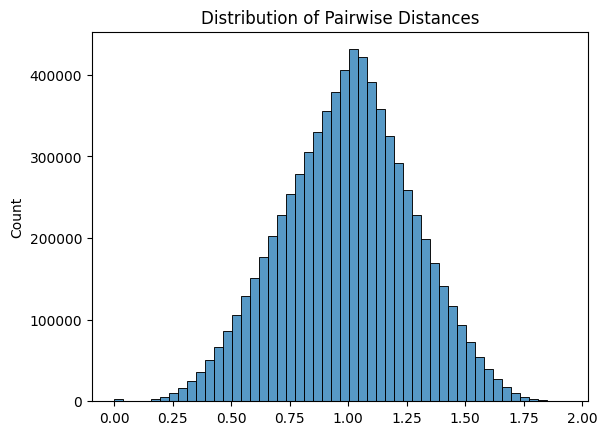

In [48]:
def cosine_to_distance(similarity_matrix):
    return 1-similarity_matrix
distance_matrix=cosine_to_distance(similarity_matrix)
sns.histplot(distance_matrix.values.flatten(), bins=50)
plt.title("Distribution of Pairwise Distances")
plt.show()

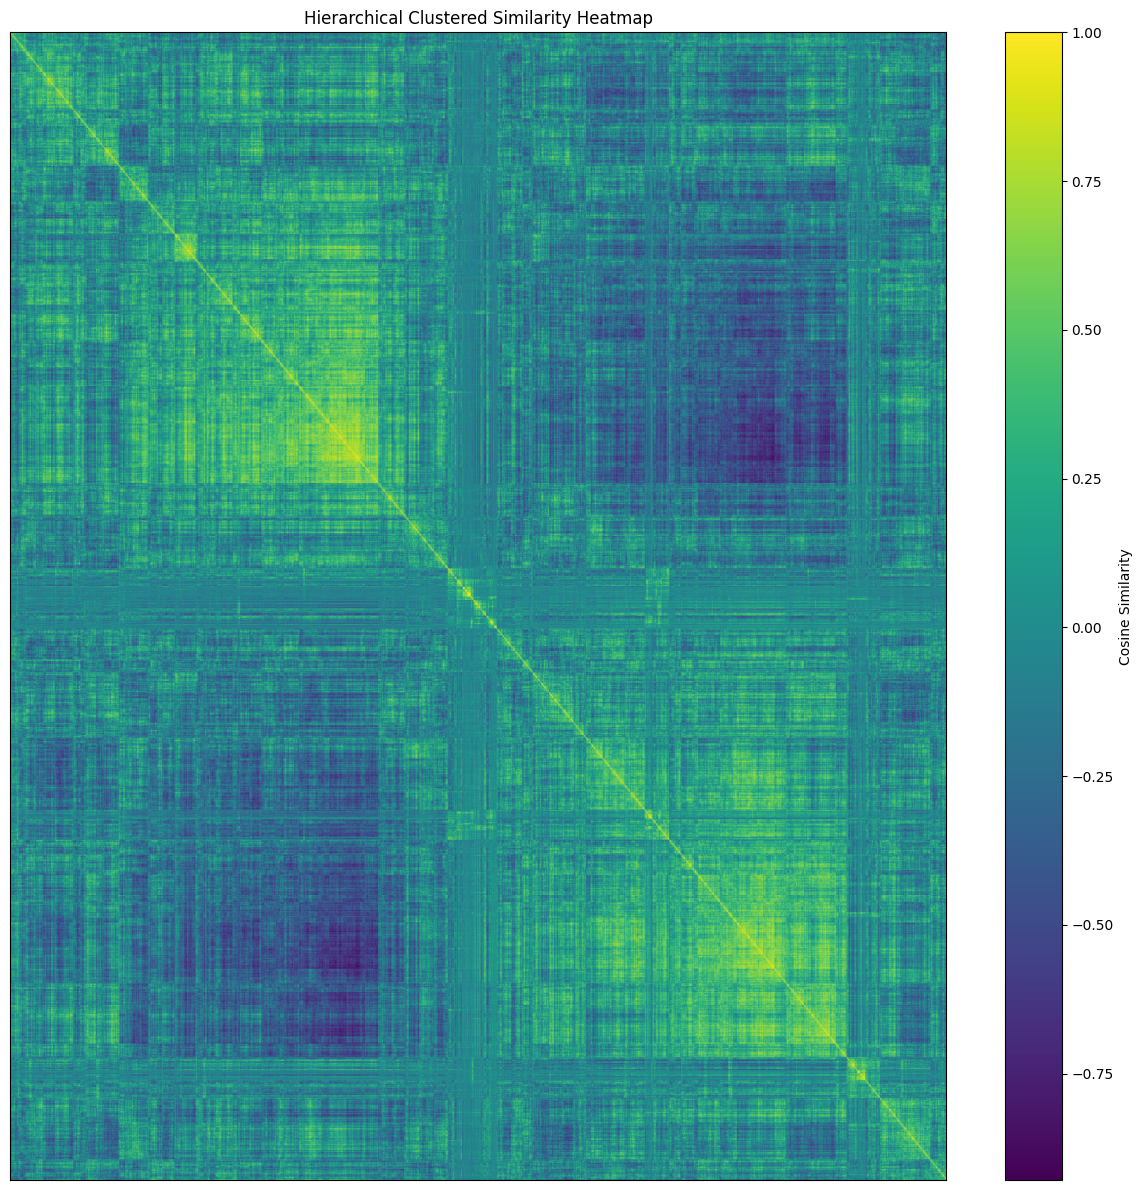

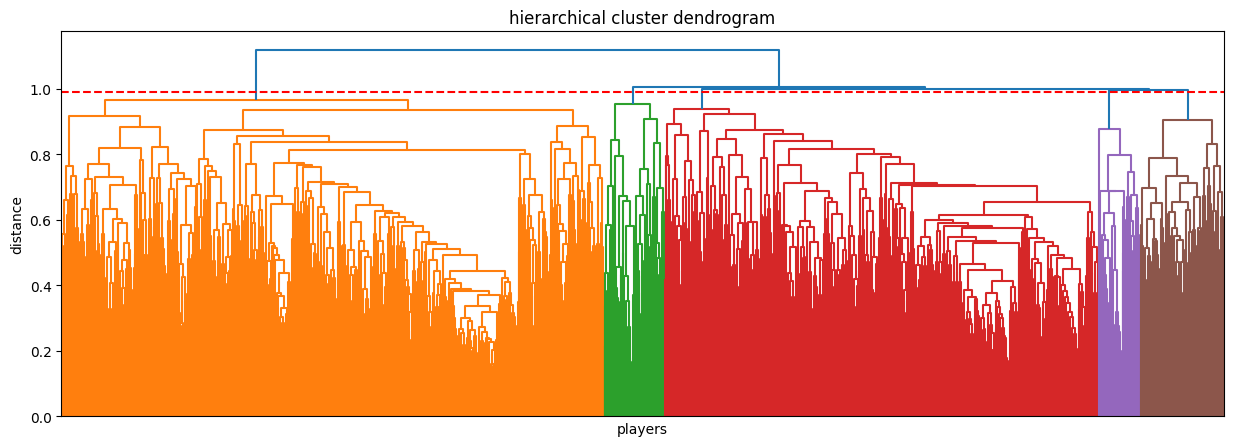

                         Player  Cluster
2677             Николай Хныкин        1
2642          Азат Габдрахманов        1
2673              Никита Довбня        1
2672           Нечитайло Нікіта        1
2671         Наталья Зайнуллина        1
...                         ...      ...
2379                 Vaishali R        5
2381           Valentin Dragnev        5
2363  Ulises Hernández Bermúdez        5
2366          Umut Erdem Gündüz        5
2690      Эдуардо Гербелли Нето        5

[2695 rows x 2 columns]

Number of players in each cluster:
Cluster
1    1259
2     141
3    1006
4      96
5     193
Name: count, dtype: int64


In [50]:
def hierarchical_cluster(similarity_matrix,method='average',threshold=1.0):
    distance_matrix=cosine_to_distance(similarity_matrix)
    np.fill_diagonal(distance_matrix.values,0)
    condenwosed_distance=squareform(distance_matrix.values)
    Z=sch.linkage(condenwosed_distance,method=method) #average/complete
    #画热力图要用到的新排序
    order=sch.leaves_list(Z)
    reordered_similarity = similarity_matrix.iloc[order, :].iloc[:, order]
    #heatmap
    plt.figure(figsize=(12,12))
    plt.imshow(reordered_similarity, cmap='viridis', aspect='auto')
    plt.colorbar(label='Cosine Similarity')
    plt.title('Hierarchical Clustered Similarity Heatmap')
    #plt.xticks(range(len(order)), reordered_similarity.columns, rotation=90)
    #plt.yticks(range(len(order)), reordered_similarity.index)
    plt.xticks([])  
    plt.yticks([])
    plt.tight_layout()
    plt.savefig("cluster_heatmap.png", dpi=150)
    plt.show()
    #dendrogram
    plt.figure(figsize=(15,5))
    sch.dendrogram(Z,labels=similarity_matrix.index.tolist(),orientation='top',color_threshold=threshold)
    plt.axhline(y=threshold, color='r', linestyle='--') #cutline
    plt.title('hierarchical cluster dendrogram')
    plt.xlabel('players')
    plt.ylabel('distance')
    plt.xticks([])
    plt.show()

    clusters=sch.fcluster(Z, threshold, criterion='distance')
    return clusters, Z
clusters,Z=hierarchical_cluster(similarity_matrix, method='average', threshold=0.99)
cluster_df = pd.DataFrame({'Player': similarity_matrix.index, 'Cluster': clusters})
print(cluster_df.sort_values(by='Cluster'))
cluster_counts = cluster_df['Cluster'].value_counts().sort_index()
print("\nNumber of players in each cluster:")
print(cluster_counts)

In [52]:
def cosine_to_distance(similarity_matrix):
    return 1 - similarity_matrix

def hierarchical_cluster_interactive(similarity_matrix, method='average', threshold=1.0, output_csv="clusters.csv"):
    if not isinstance(similarity_matrix, pd.DataFrame):
        raise ValueError("Input similarity_matrix must be a pandas DataFrame.")
    
    distance_matrix = cosine_to_distance(similarity_matrix)
    print("Distance matrix:")
    print(distance_matrix.head())
    
    np.fill_diagonal(distance_matrix.values, 0) 
    condensed_distance = squareform(distance_matrix.values)
    print("Condensed distance matrix (first 5 elements):")
    print(condensed_distance[:5])
    
    Z = sch.linkage(condensed_distance, method=method)
    order = sch.leaves_list(Z)
    reordered_similarity = similarity_matrix.iloc[order, :].iloc[:, order]
    
    clusters = sch.fcluster(Z, threshold, criterion='distance')
    clusters_df = pd.DataFrame({
        'Player': similarity_matrix.index,
        'Cluster': clusters
    })
    clusters_df.to_csv(output_csv, index=False)
    print(f"Cluster results saved to {output_csv}")
    
    return clusters, Z

for t in [0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]:
    output_file = f"clusters_threshold_{t}.csv"
    try:
        clusters, Z = hierarchical_cluster_interactive(similarity_matrix, method='average', threshold=t, output_csv=output_file)
        print(f"Threshold {t}: {len(set(clusters))} clusters")
    except Exception as e:
        print(f"Error at threshold {t}: {e}")

Distance matrix:
user               4empechement  AFRUZA Khamdamova  Aadit Bhatia  \
user                                                               
4empechement      -2.220446e-16           0.985703  1.176146e+00   
AFRUZA Khamdamova  9.857029e-01           0.000000  1.032420e+00   
Aadit Bhatia       1.176146e+00           1.032420 -2.220446e-16   
Aaditya Dhingra    8.989733e-01           0.548340  1.124891e+00   
Aakaash Meduri     1.069049e+00           1.022307  3.057930e-01   

user               Aaditya Dhingra  Aakaash Meduri  Aakash G  \
user                                                           
4empechement          8.989733e-01    1.069049e+00  0.727955   
AFRUZA Khamdamova     5.483398e-01    1.022307e+00  0.931492   
Aadit Bhatia          1.124891e+00    3.057930e-01  0.750425   
Aaditya Dhingra       1.110223e-16    1.116777e+00  0.964284   
Aakaash Meduri        1.116777e+00   -2.220446e-16  0.804072   

user               Aansh Nandan Nerurkar  Aaradhya Das  A

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

hierarchical_results = pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\player-cluster\clusters_threshold_0.99.csv")
community_results = pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\player-cluster\community_classification.csv")
results_df = pd.merge(hierarchical_results, community_results, left_on="Player", right_on="Node", how="inner", suffixes=('_method1', '_method2'))
labels_hire = results_df['Community']
labels_community = results_df['Cluster']
ari = adjusted_rand_score(labels_hire, labels_community)
nmi = normalized_mutual_info_score(labels_hire, labels_community)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")


Adjusted Rand Index (ARI): 0.40917508012988635
Normalized Mutual Information (NMI): 0.36116523006650947


把所有结果和ELO对齐，最后更新成带elo的文件

In [67]:
df_community=pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\player-cluster\community_visualization_data.csv")
df_elo=pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\basic\newestELO\name_to_elos.csv")
df_community_new=df_community.merge(df_elo,left_on='Node',right_on="Name", how="left")
df_community_new = df_community_new.drop(
    columns=['Node', 'X', 'Y', 'Unnamed: 0'],
    errors='ignore'
)
df_community_new
df_community_new.to_csv("df_community_new.csv", index=False)

In [69]:
df_097=pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\player-cluster\clusters_threshold_0.97.csv")
df_elo=pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\basic\newestELO\name_to_elos.csv")
df_097=df_097.merge(df_elo,left_on='Player',right_on="Name", how="left")
df_097 = df_097.drop(
    columns=['Player', 'Unnamed: 0'],
    errors='ignore'
)
df_097
df_097.to_csv("df_097.csv", index=False)

In [74]:
df_097=pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\player-cluster\clusters_threshold_0.92.csv")
df_elo=pd.read_csv(r"C:\Users\Administrator\Desktop\playerstyles\Chess\basic\newestELO\name_to_elos.csv")
df_097=df_097.merge(df_elo,left_on='Player',right_on="Name", how="left")
df_097 = df_097.drop(
    columns=['Player', 'Unnamed: 0'],
    errors='ignore'
)
df_097
df_097.to_csv("df_092.csv", index=False)